# **Prediction of Rice Production on Sumatera Island, Indonesia**

- Nama: Arjuna Nur Arrafi
- NIM: A11.2022.14174
- Mata Kuliah: Machine Learning
- Prodi: Teknik Informatika

# Ringkasan & Permasalahan Project
**Ringkasan**
Project ini bertujuan untuk mengembangkan model machine learning yang dapat
memprediksi hasil pertanian komoditas bahan pangan di wilayah Sumatera berdasarkan
data cuaca historis dan variabel lainnya. Model ini diharapkan dapat membantu petani
dan pemangku kepentingan lainnya dalam mengantisipasi dan mengelola risiko yang
terkait dengan perubahan cuaca yang semakin ekstrim akibat dampak perubahan iklim
global.


**Permasalahan Project**

1.1 Prediksi Produksi Padi yang Akurat:
Bagaimana kita dapat memprediksi produksi padi di Pulau Sumatera dengan akurasi tinggi menggunakan data historis dan faktor cuaca? Memastikan model prediksi dapat memberikan hasil yang akurat sangat penting untuk membantu petani dalam perencanaan dan pengambilan keputusan.

1.2 Identifikasi Faktor yang Mempengaruhi Produksi:
Faktor-faktor apa saja yang secara signifikan mempengaruhi produksi padi di Pulau Sumatera? Identifikasi faktor-faktor kunci seperti curah hujan, suhu, dan kelembapan akan membantu dalam memahami dinamika produksi padi dan memberikan wawasan untuk pengelolaan pertanian yang lebih baik.

1.3 Optimasi Luas Panen:
Bagaimana kita dapat mengoptimalkan luas panen untuk memaksimalkan produksi padi? Dengan mengetahui hubungan antara luas panen dan faktor-faktor lingkungan, kita dapat memberikan rekomendasi yang lebih baik untuk pemanfaatan lahan yang lebih efektif.

1.4 Pengelolaan Risiko:
Bagaimana kita dapat mengurangi risiko kerugian yang disebabkan oleh kondisi cuaca yang tidak dapat diprediksi? Dengan menggunakan model prediksi yang andal, kita dapat memberikan peringatan dini dan strategi mitigasi risiko untuk para petani.

1.5 Efisiensi Penggunaan Sumber Daya:
Bagaimana kita dapat memastikan penggunaan sumber daya seperti air dan pupuk secara efisien untuk mencapai produksi padi yang optimal? Dengan menganalisis data dan memberikan rekomendasi yang tepat, kita dapat membantu petani mengoptimalkan penggunaan sumber daya dan mengurangi pemborosan.



**Tujuan yang akan dicapai**

- Mengumpulkan dan menganalisis data historis produksi padi di Pulau Sumatera.
- Mengidentifikasi faktor-faktor utama yang mempengaruhi produksi padi.
- Mengembangkan model prediksi produksi padi menggunakan teknik machine learning.
- Mengevaluasi kinerja model dan menentukan model terbaik berdasarkan metrik evaluasi yang dipilih.
- Memberikan rekomendasi berbasis data untuk meningkatkan produksi padi di masa mendatang.



**Model / Alur Penyelesaian**
Model yang digunakan dalam project ini adalah
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting
4. Support Vector Regressor 
5. Decision Tree Regressor and
6. K-Nearest Neighbors Regresso

Alur penyelesaian project ini adalah sebagai berikut:
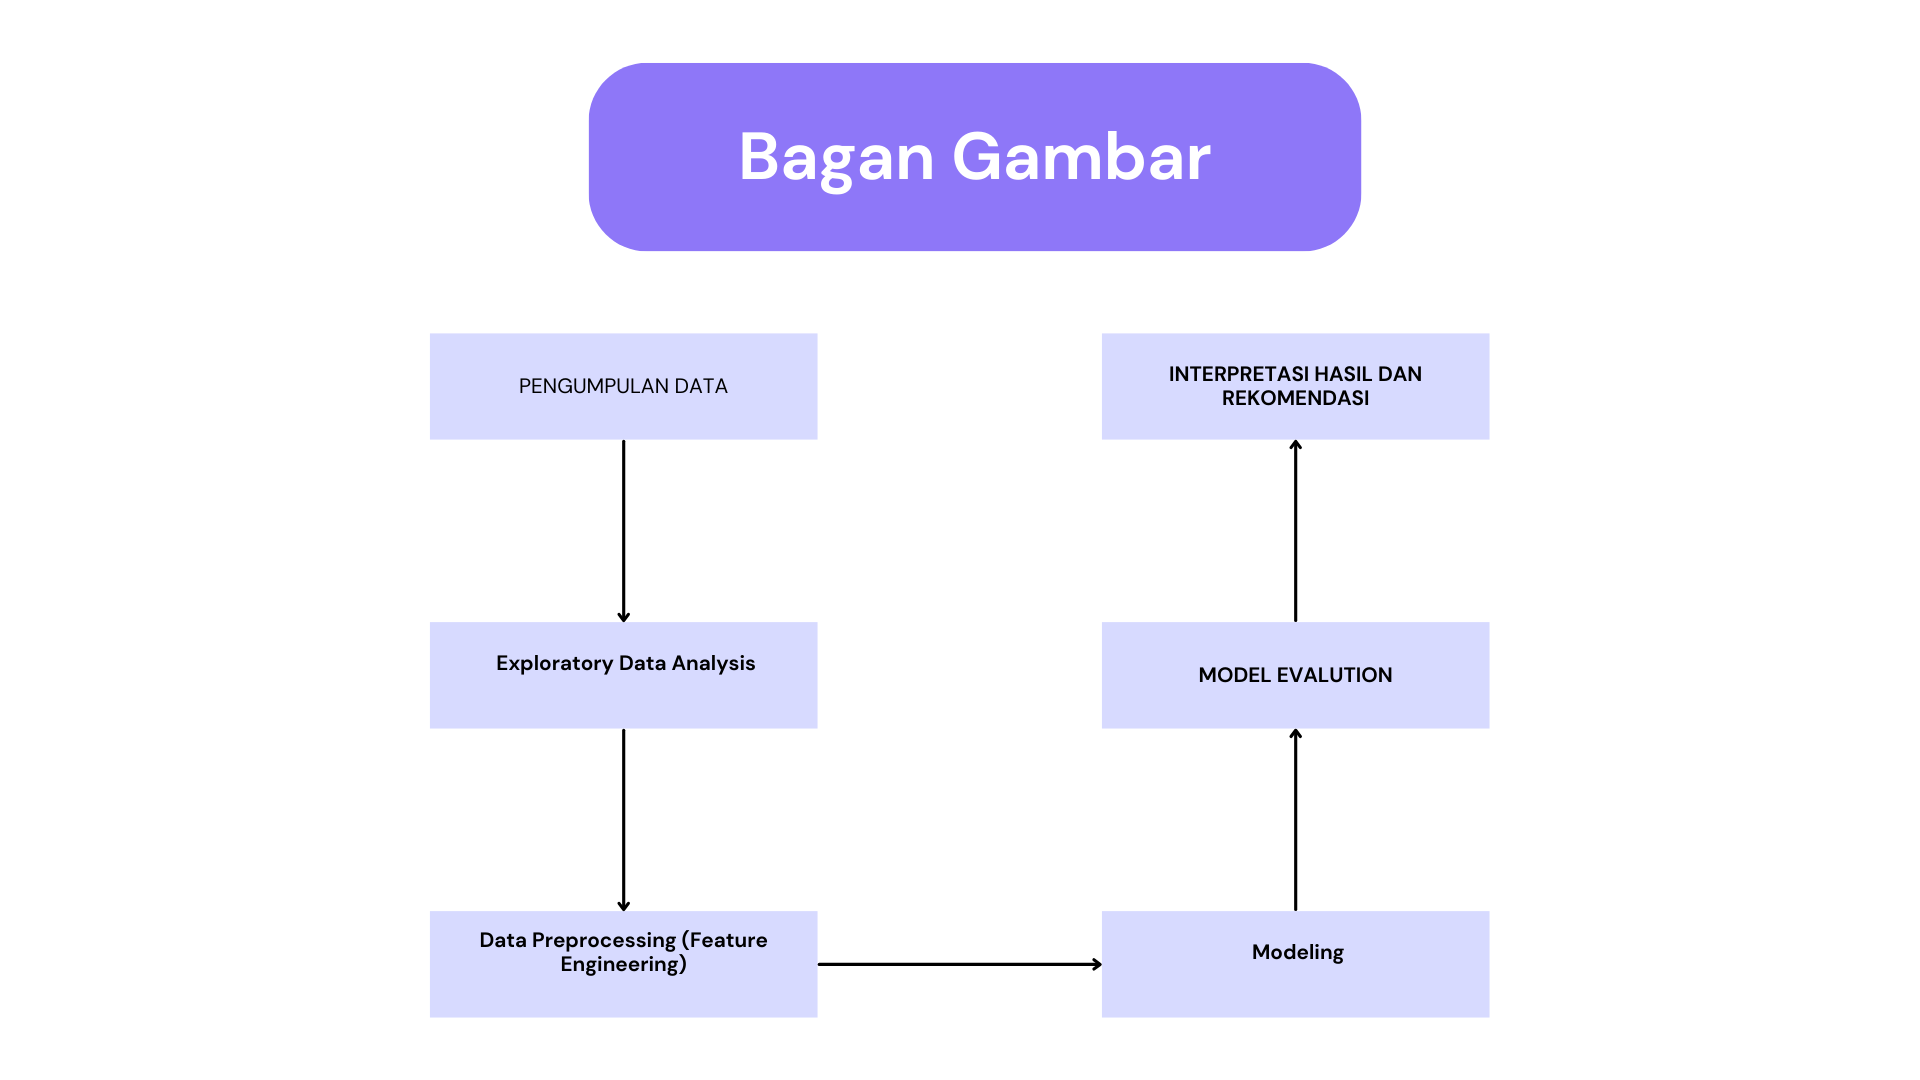




# 1. Load Dataset

In [1]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:/Users/acer/Downloads/UAS-ML/Data_Tanaman_Padi_Sumatera_version_1.csv')
data

In [ ]:
#check row and column
data.shape

The total data is 224 which for each province has 28 annual data.

The dataset consists of the following attributes:
1. **Province**: Name of province
2. **Year**: Year of rice production
3. **Production**: Production results or annual harvest (tons)
4. **Land Area**: Agricultural area (hectares)
5. **Rainfall**: Average amount of rainfall in a year (millimeters)
6. **Humidity**: Average humidity level in a year (percentage)
7. **Average Temperature**: The average degree of temperature in a year (celsius)

Attributes number 1 - 4 collected from the Indonesian Central Bureau of Statistics Database, and other attributes are collected from the Indonesian Agency for Meteorology, Climatology and Geophysics Database

In [ ]:
data.info()

# 2. Exploratory Data Analysis

In [ ]:
data.isnull().sum()

In [ ]:
#overview statistics descriptive
data.describe()

The average yield in 8 provinces for 28 years was 1679700.887 tons with the lowest yield was 42938 tons and the highest was 4881089 tons. The average area of ​​agricultural land is 374350 hectares.

From the data description above, it can be seen that the mean and median values ​​of each attribute are not much different. So it can be said that the data is normally distributed.



In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi', y='Produksi', data=data)
plt.show()

North Sumatera has the highest yield production in the dataset.

In [8]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

C:\Users\acer\AppData\Local\Temp\ipykernel_13760\659015857.py:1: FutureWarning: The provided callable <function mean at 0x0000022F59E7D260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)


,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


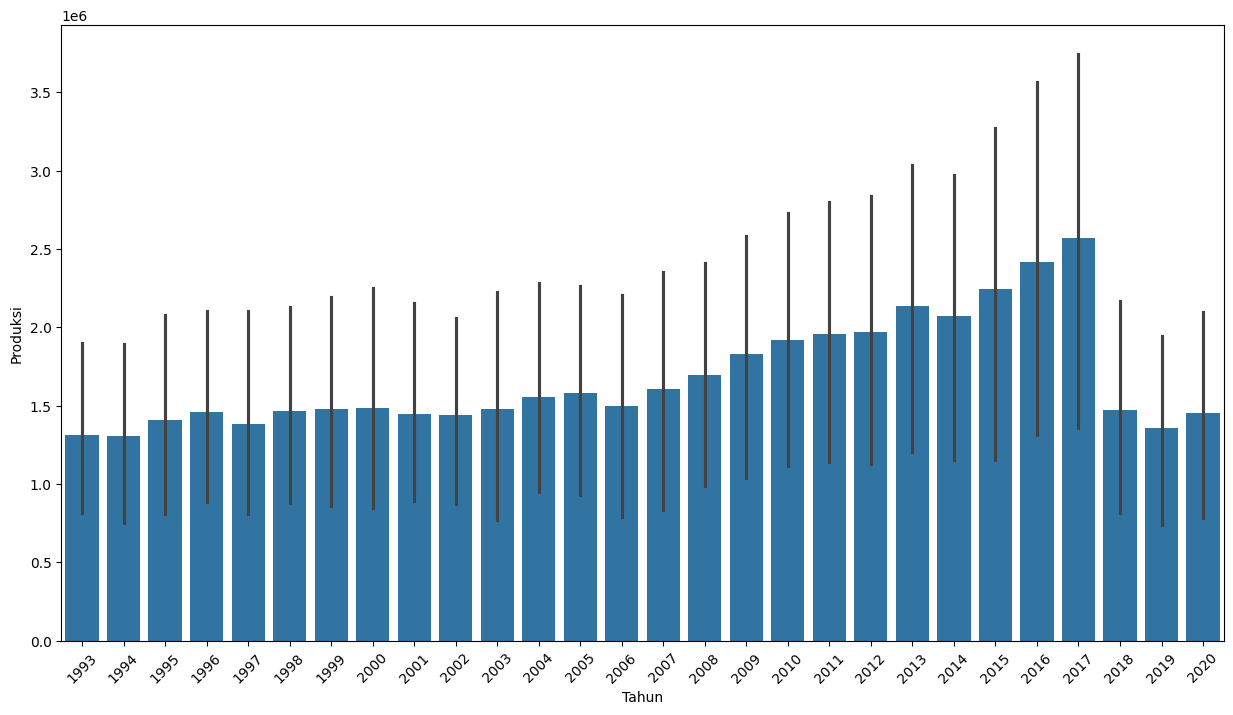

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun', y='Produksi', data=data)
plt.xticks(rotation=45)
plt.show()

The year with the largest production was in 2017, but in the following years production has decreased significantly.

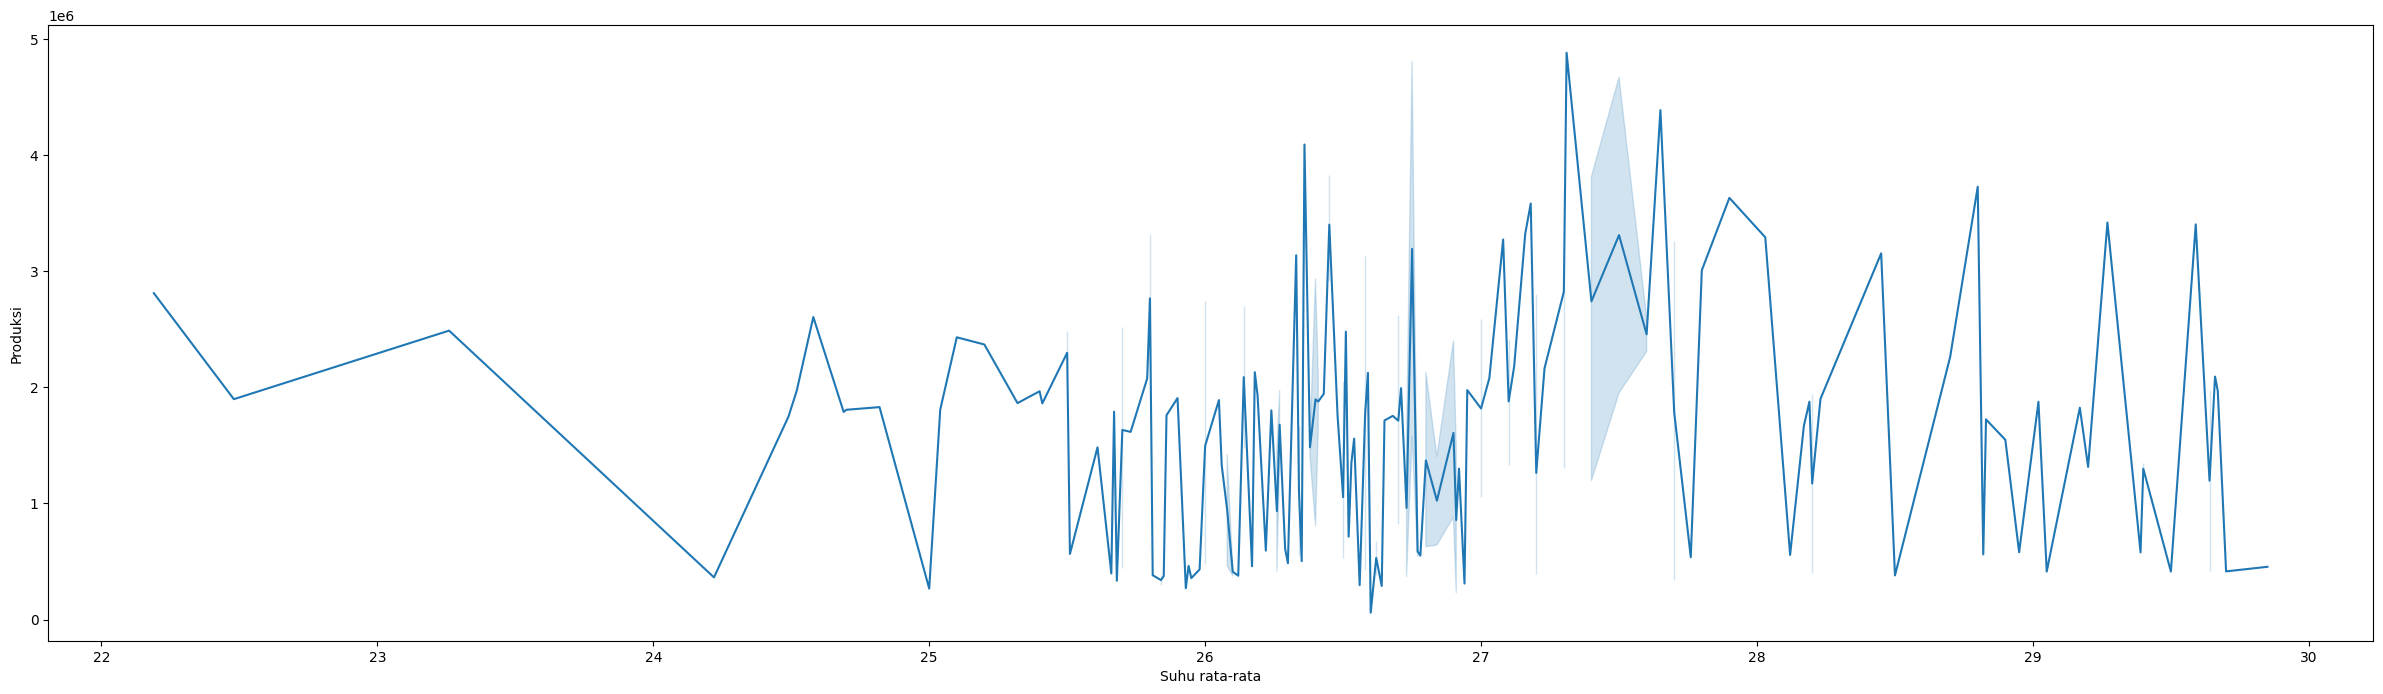

In [10]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Suhu rata-rata', y='Produksi', data=data)
plt.show()


Maximum production occurs when the average temperature is in the range of 27-28 degrees Celsius.

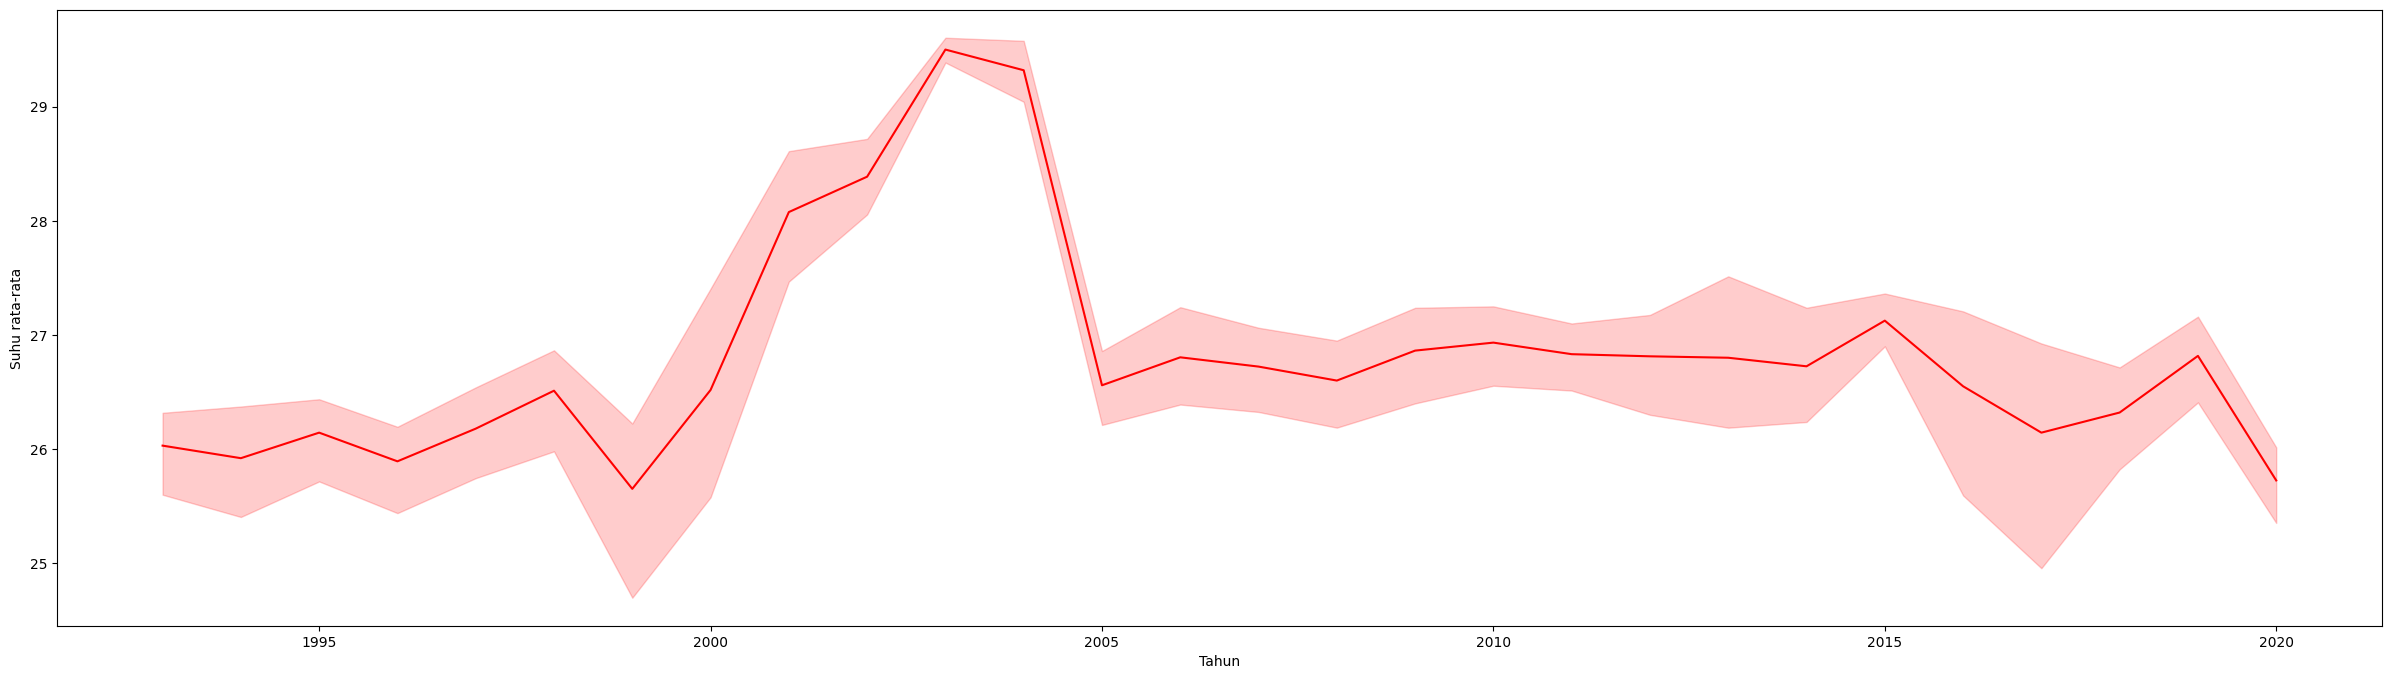

In [11]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Tahun', y='Suhu rata-rata', data=data, color='red')
plt.show()


The highest average temperature was ever achieved in the year 2000-2005, which was more than 29 degrees Celsius, but in the following years it tended to be stable in the temperature range of 27 degrees Celsius.

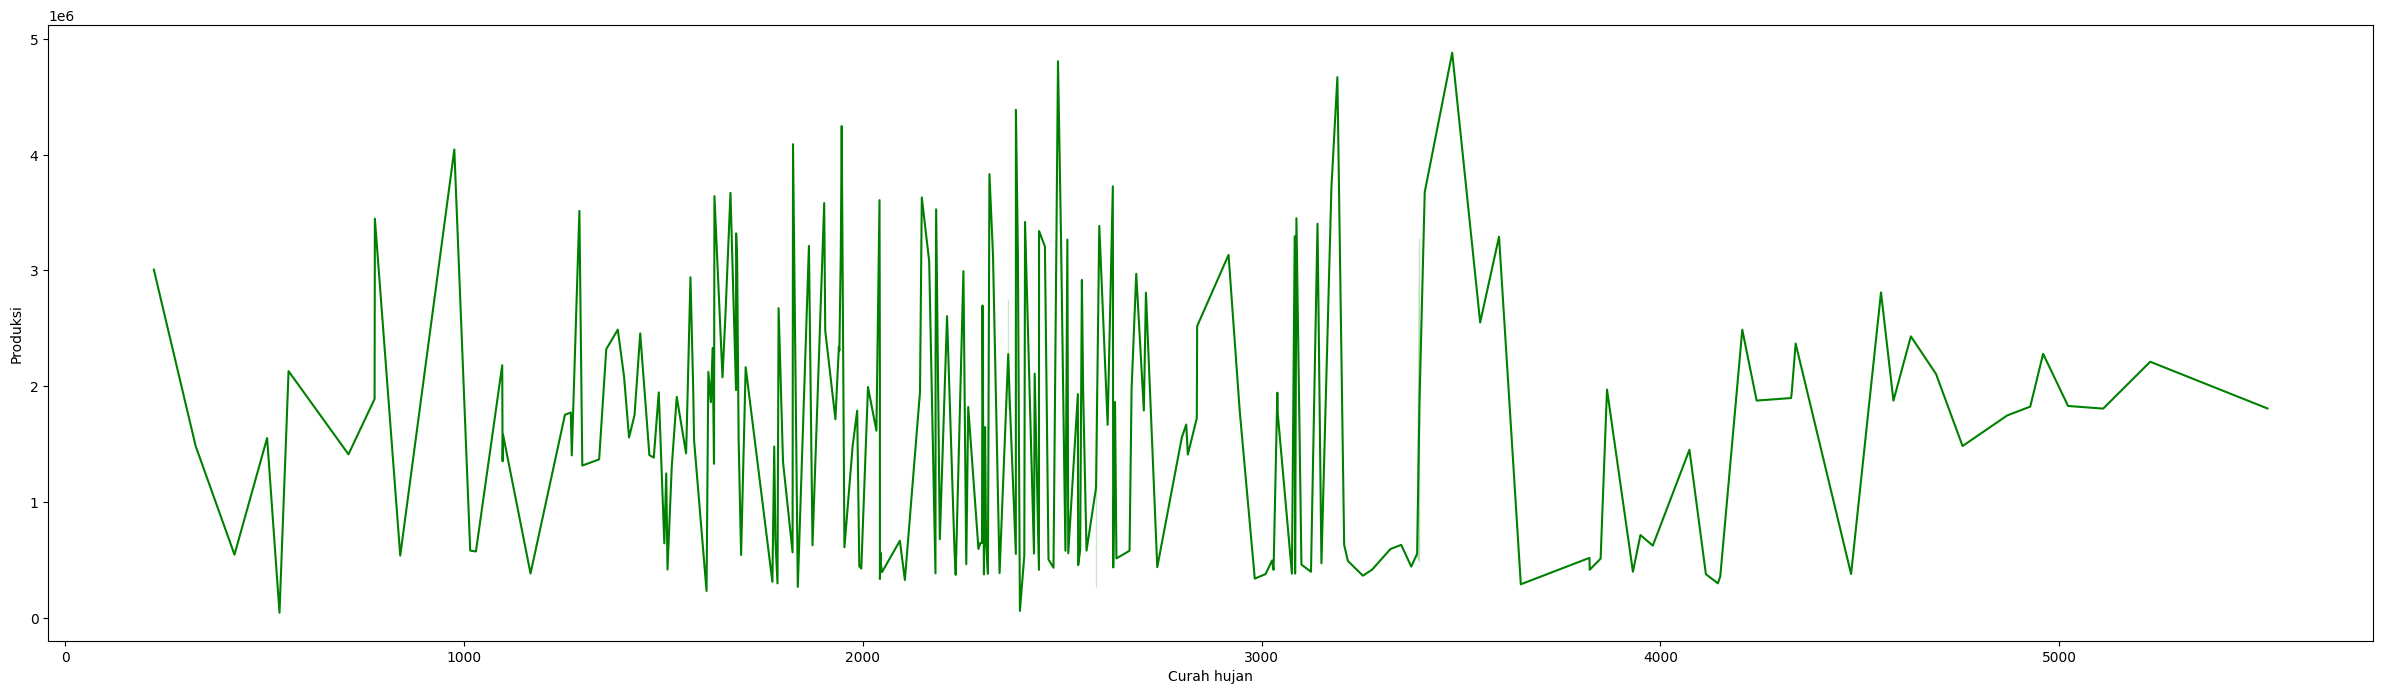

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 8))
sns.lineplot(x='Curah hujan', y='Produksi', data=data, color='green')
plt.show()


It can be said that production may be more stable in moderate rainfall, which is around 2500mm per year.

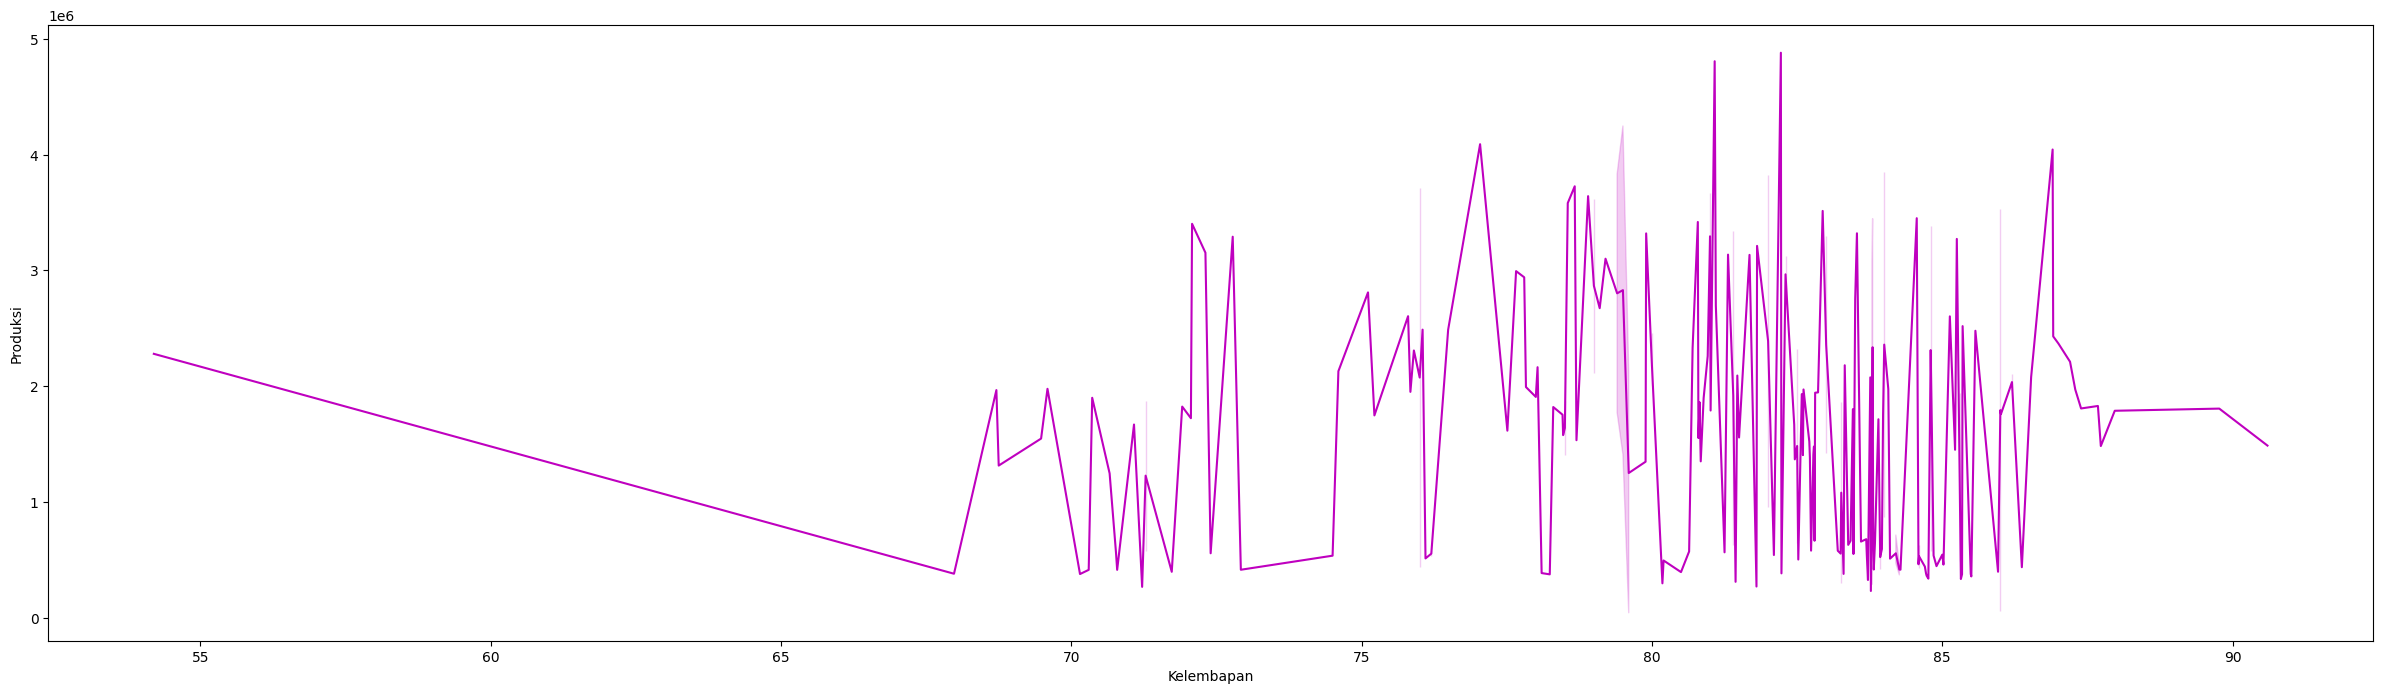

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 8))
sns.lineplot(x='Kelembapan', y='Produksi', data=data, color='m')
plt.show()

At a humidity level of around 80-85%, production looks more optimal and stable.

Based on the purpose of this notebook, the attribute that will be the output is the harvest (column = Production).

**a. Distribution of production quantities**

In [14]:
#statistical plot
import scipy.stats as stats
import pylab as py

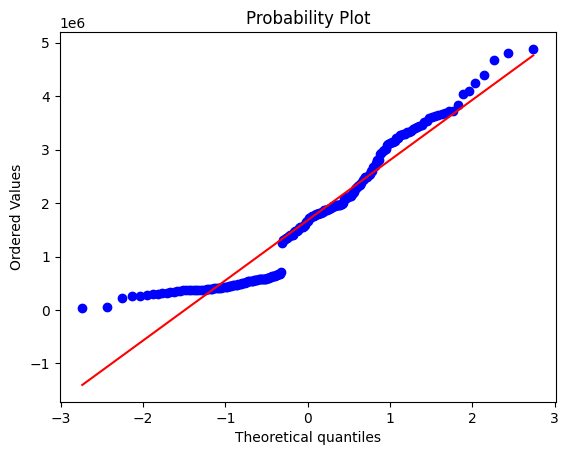

In [15]:
#QQ-plot (Quantile-Quantile Plot)
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

The QQ-plot above shows how the data is distributed from the selected variable, namely **Production** variable. The plot above is a plot of the theoretical quantile values ​​with the quantile values ​​of the selected variables. So, the plot will describe how many values ​​in a distribution are above or below a certain limit. From the plot results above, it is obtained that the lines tend to be straight, which means that over all the data distribution of these variables tends to be normal.

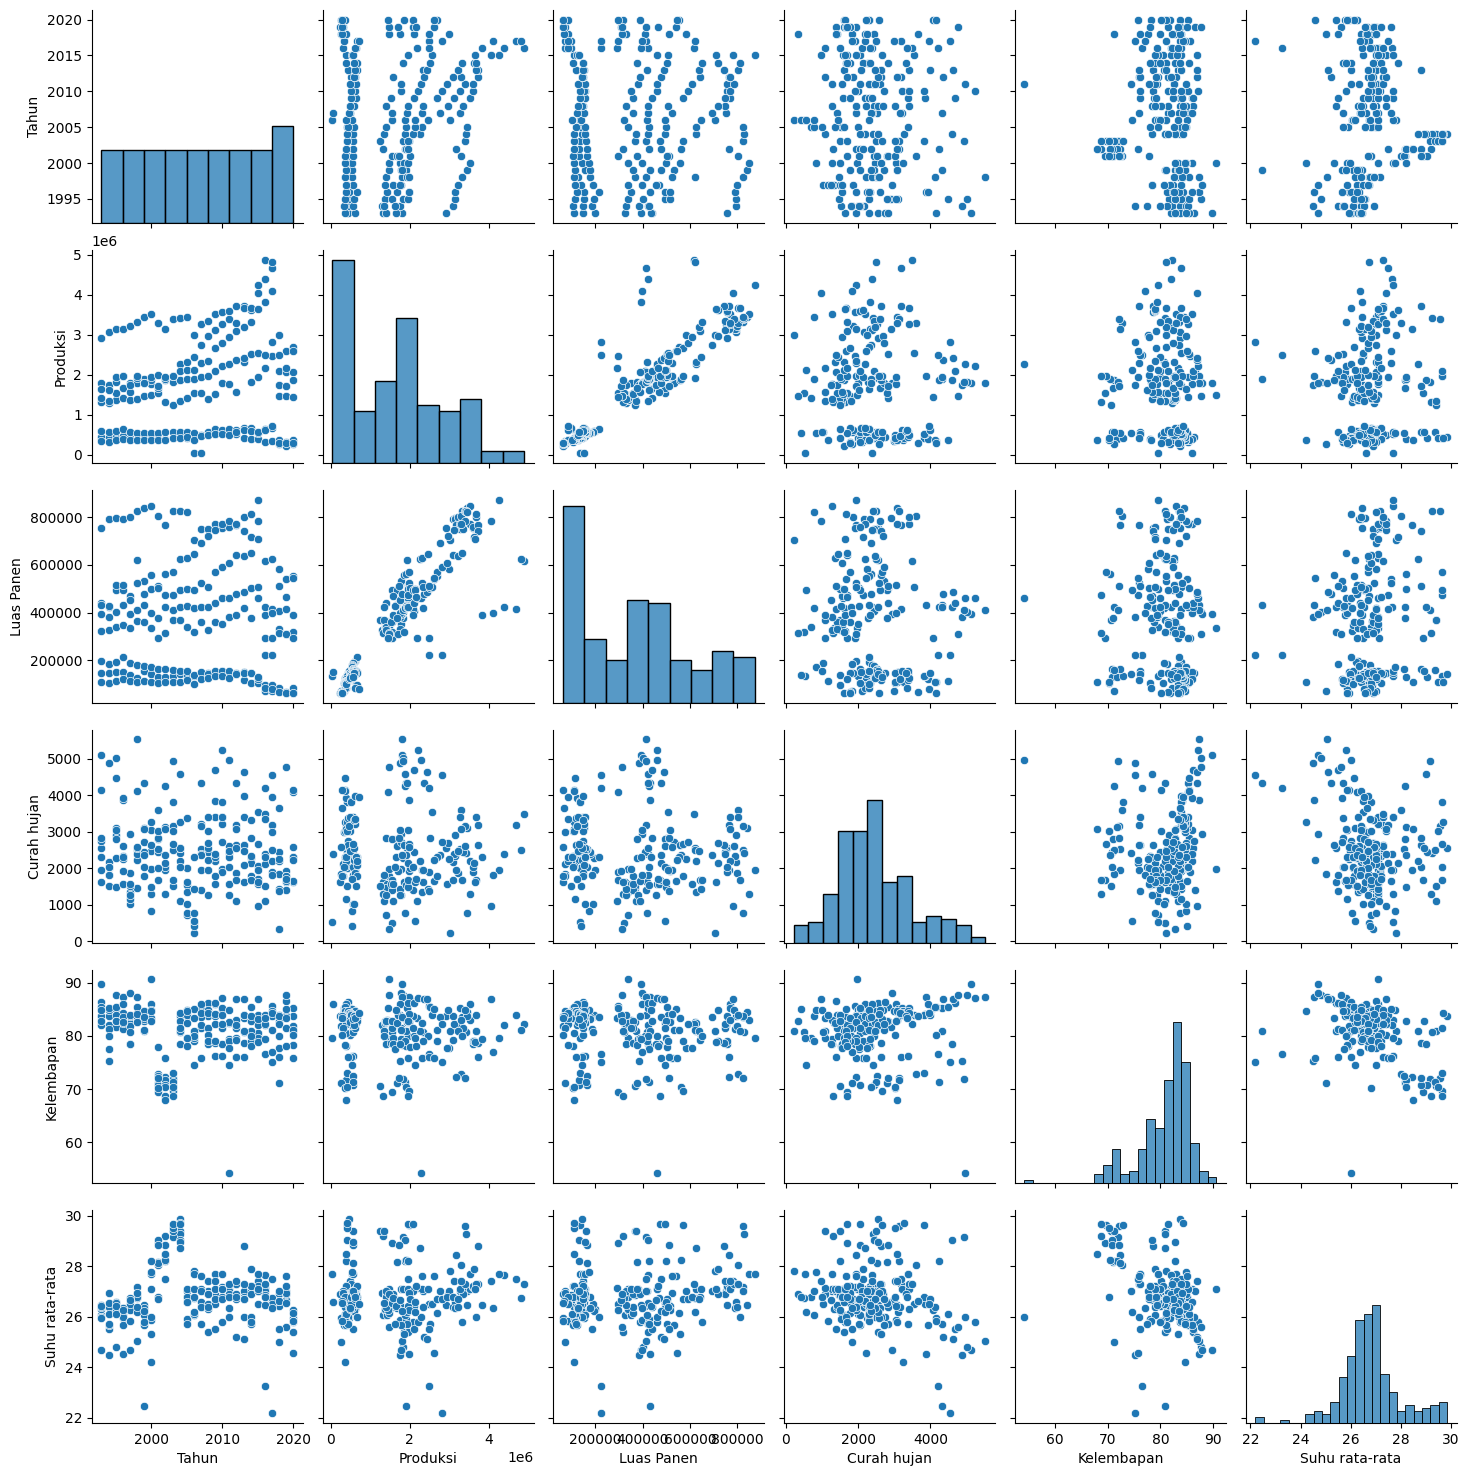

In [16]:
sns.pairplot(data)

**b. Checking the Outlier**

<Axes: >

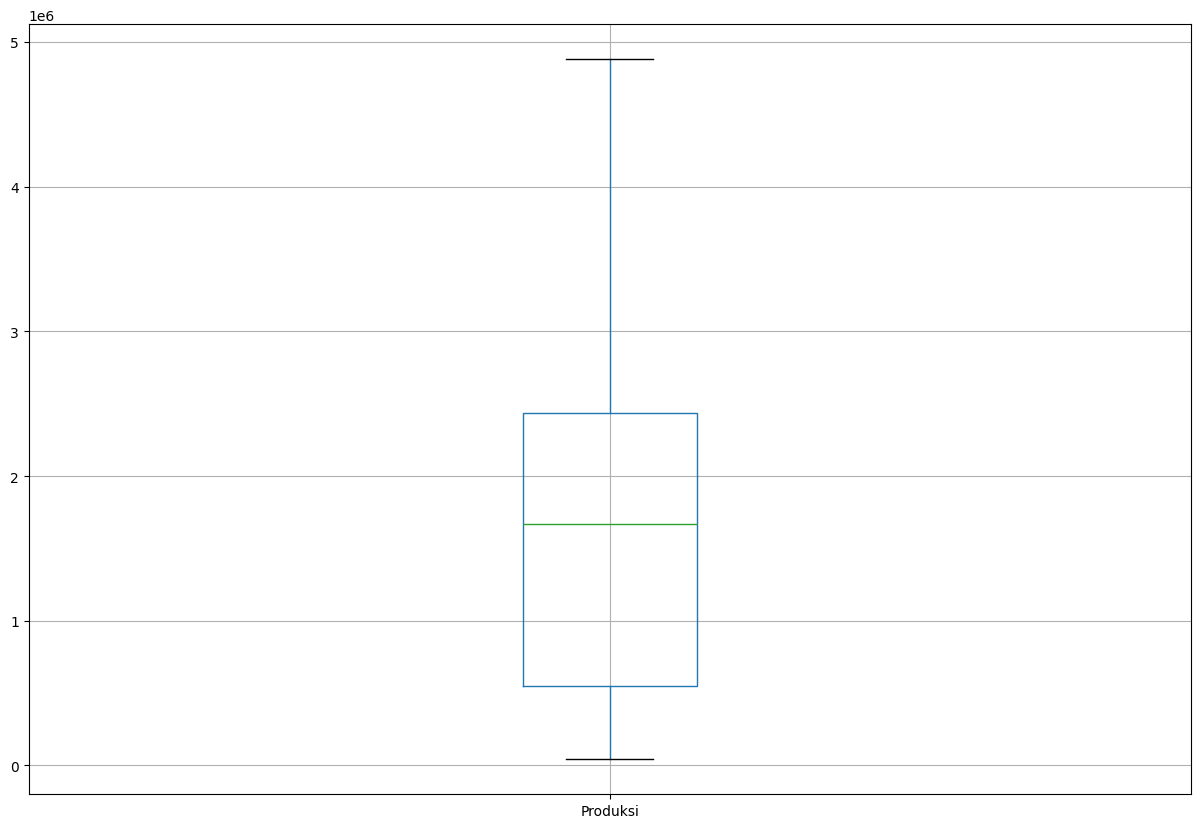

In [17]:
data[['Produksi']].boxplot(figsize=(15,10))

From the results of the vertical boxplot visualization above, it can be seen that there are no outliers from the output variable, **Production**.

**c. Correlation Matrix between numerical variables**

In [18]:
data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [19]:
#change the column order
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Note:
- Correlation >= 0.5 there is a coherent relationship between variables
- Correlation < 0.5 there is no close relationship between variables

                   Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
Tahun           1.000000  0.182527   -0.045951    -0.047645   -0.033474   
Produksi        0.182527  1.000000    0.905622    -0.042129   -0.052316   
Luas Panen     -0.045951  0.905622    1.000000    -0.092975   -0.061121   
Curah hujan    -0.047645 -0.042129   -0.092975     1.000000    0.056466   
Kelembapan     -0.033474 -0.052316   -0.061121     0.056466    1.000000   
Suhu rata-rata  0.004923  0.041160    0.115726    -0.228699   -0.407799   

                Suhu rata-rata  
Tahun                 0.004923  
Produksi              0.041160  
Luas Panen            0.115726  
Curah hujan          -0.228699  
Kelembapan           -0.407799  
Suhu rata-rata        1.000000  


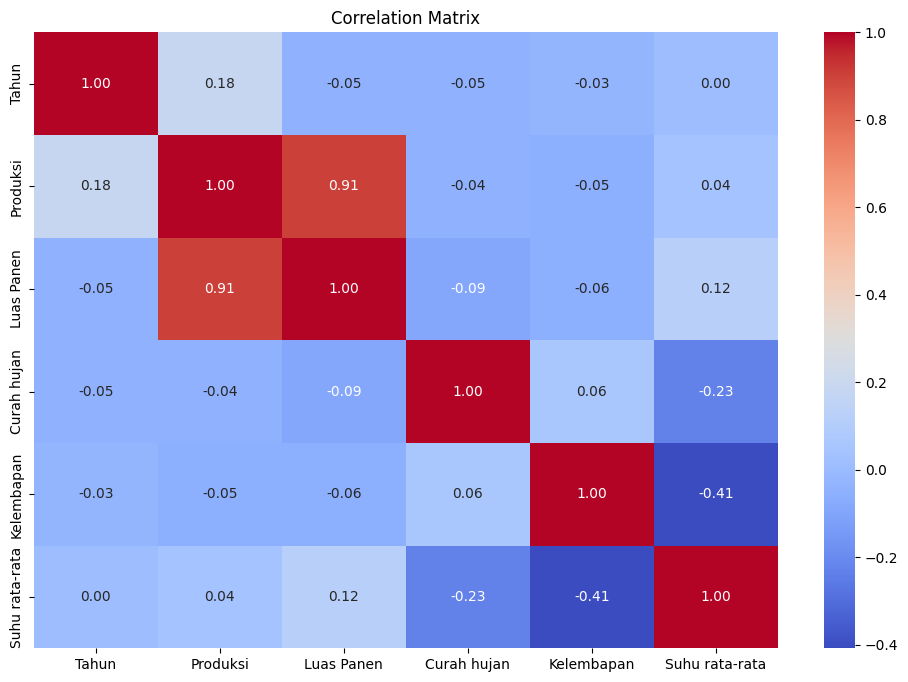

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into a DataFrame (example, replace with your actual file)
df = pd.read_csv(r'C:\Users\acer\Downloads\Data_Tanaman_Padi_Sumatera_version_1.csv')

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


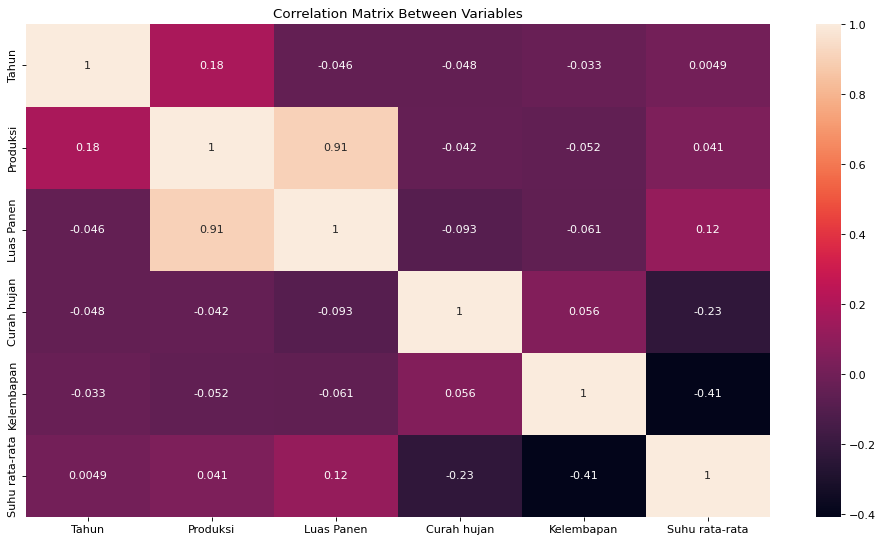

In [21]:
if not correlation_matrix.empty and correlation_matrix.shape[0] > 1:
    fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
    sns.heatmap(correlation_matrix, cmap='rocket', annot=True)
    plt.title('Correlation Matrix Between Variables')
    plt.show()
else:
    print("Correlation matrix is empty or not valid for plotting.")

From the correlation matrix, it can be seen the type of correlation between the independent variables and the output variable. 

The area of ​​agricultural land and the average temperature have a positive correlation value, which means that when the value of those independent variable is greater, the production will also increase, although it may not be significant (effect from temperature). 

Meanwhile, the rainfall and humidity variables have a negative correlation value, which means that when those two variables get smaller, the production will increase (the movement of the graph moves in reverse), even though the relationship is not that strong.

# 3. Data Preprocessing (Feature Engineering)

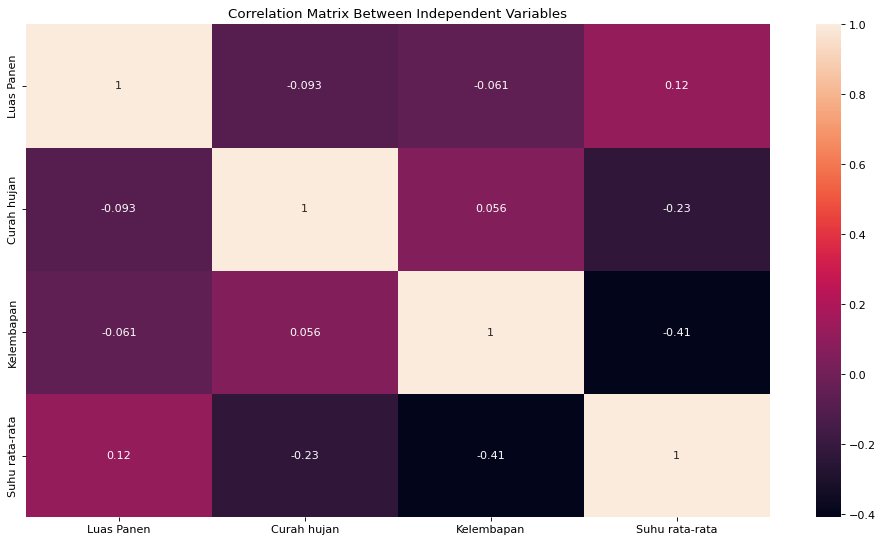

In [22]:
# Checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(data.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Independent Variables')
plt.show()

**Multicollinearit**y is a situation that indicates a strong correlation or relationship between two or more independent variables in a regression model which will affect the stability and accuracy of the model. One way to detect the existence of multicollinearity in the regression model is by looking at the strength of the correlation between the independent variables. If there is a correlation between the independent variables > 0.8 it can indicate the presence of multicollinearity.

So, from the matrix above it can be concluded that there is no multicollinearity found.

## Feature Encoding

Categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this dataset, 'Province' values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form. 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert 'Province' columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your data into a DataFrame (replace 'your_data_file.csv' with your actual file)
df = pd.read_csv('C:/Users/acer/Downloads/Data_Tanaman_Padi_Sumatera_version_1.csv')

# Specify the categorical feature to be one-hot encoded
string_feat = ['Provinsi']

# Initialize the OneHotEncoder
ohe = OneHotEncoder()

# Fit the encoder and transform the data
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                            columns=ohe.get_feature_names_out())

# Concatenate the original DataFrame with the one-hot encoded data
df = pd.concat([df, data_ohe_res], axis=1)

# Drop the original categorical columns if no longer needed
df.drop(columns=string_feat, inplace=True)
print(df.head())


   Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata  \
0   1993  1329536.0    323589.0       1627.0       82.00           26.06   
1   1994  1299699.0    329041.0       1521.0       82.12           26.92   
2   1995  1382905.0    339253.0       1476.0       82.72           26.27   
3   1996  1419128.0    348223.0       1557.0       83.00           26.08   
4   1997  1368074.0    337561.0       1339.0       82.46           26.31   

   Provinsi_Aceh  Provinsi_Bengkulu  Provinsi_Jambi  Provinsi_Lampung  \
0            1.0                0.0             0.0               0.0   
1            1.0                0.0             0.0               0.0   
2            1.0                0.0             0.0               0.0   
3            1.0                0.0             0.0               0.0   
4            1.0                0.0             0.0               0.0   

   Provinsi_Riau  Provinsi_Sumatera Barat  Provinsi_Sumatera Selatan  \
0            0.0                

## Feature Selection

In [24]:
df = df.drop(columns='Tahun')
df.tail()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,3831923.00,390799.00,2317.6,79.40,26.45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,4090654.00,396559.00,1825.1,77.04,26.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,2488641.91,511940.93,1385.8,76.05,25.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,2164089.33,464103.42,1706.4,78.03,27.23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,2604913.29,545149.05,2211.3,75.80,24.58,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

## Train and Test Split

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset).

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. We can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset).

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [27]:
X_train = x_train
X_test = x_test

In [28]:
X_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


## Feature Scaling

The dataset contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [31]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01,  2.76887462e+00, -4.05190208e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01,  2.46797672e+00],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [32]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [33]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [34]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [35]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


# 4. Modeling

Modeling is done using 6 algorithms namely: 
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting
4. Support Vector Regressor 
5. Decision Tree Regressor and
6. K-Nearest Neighbors Regressor. 

setiap model akan menerapkan penyetelan hyperparameter untuk meningkatkan performa model berdasarkan skor R2. Untuk mencari parameter terbaik akan digunakan Grid Search CV atau Randomized Search CV, dan itu tergantung bagaimana algoritma bekerja.

Validasi silang (CV) adalah prosedur pengambilan sampel ulang yang digunakan untuk mengevaluasi model pembelajaran mesin pada sampel data terbatas. Prosedur ini memiliki parameter tunggal yang disebut k yang akan dipecah menjadi sampel data tertentu. Oleh karena itu, prosedur ini sering disebut validasi silang k-fold.

Untuk mengecek bagaimana model memprediksi, akan direpresentasikan visualisasi berupa gambar grafis distplot dari hasil estimasi algoritma dengan data aslinya.

Nantinya akan dilakukan evaluasi untuk menentukan algoritma terbaik dari enam algoritma yang akan dipilih.

**Catatan**: Setelah selesai melakukan tuning hyperparameter menggunakan Randomized Search CV, kode tersebut dijadikan komentar karena ketika kode dijalankan kembali maka hasil tuningnya akan berbeda, padahal skor modelnya tidak jauh berbeda.

In [36]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Linear Regression

Linear Regression is an algorithm for regression modeling that is used to predict variable values based on the values of other variables.

In [37]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [38]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #do the inverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


C:\Users\acer\AppData\Local\Temp\ipykernel_13760\3835389177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
C:\Users\acer\AppData\Local\Temp\ipykernel_13760\3835389177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

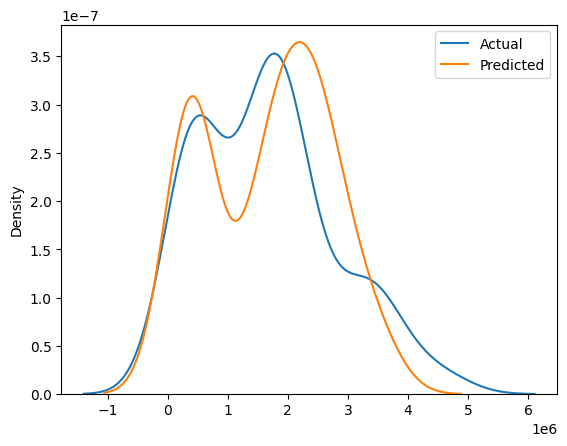

In [39]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [40]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524145 

The Average Cross Validation Score is 82.9


### Hyperparameter Tuning

In [41]:
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11), 
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

KeyboardInterrupt: 

### Fit New Model

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

In [ ]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

The new model of Linear Regression has improved just a little bit after hyperparameter tuning.

## Random Forest Regression

Random Forest Regressor is an algorithm for regression modeling that is used to predict sustainable values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

In [ ]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

### Hyperparameter Tuning

In [ ]:
RFReg.get_params()

In [ ]:
#param_grid = {'bootstrap' : [True, False],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': np.arange(100, 501)}             

#RFReg_tuning = RandomForestRegressor()

#RFReg_search = RandomizedSearchCV(RFReg_tuning, param_grid, cv = 10, scoring='r2')

#RFReg_best_model = RFReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', RFReg_best_model.best_params_)
#print('Best score is {}'.format(RFReg_best_model.best_score_))

### Fit New Model

In [ ]:
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

In [ ]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100


#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',RFReg_model_train)
print('Test  : ',RFReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_model_score)*100,2))

Random Forest Regression Model performing better after applied some tuned parameters.

## Gradient Boosting

Gradient Boosting Regressor gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

In [ ]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_score)*100,2))

### Hyperparameter Tuning

In [ ]:
GBReg.get_params()

In [ ]:
#param_grid = {'subsample' : np.arange(0.1, 1.1),
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'n_estimators': [500, 1000, 2000],
#              'learning_rate': [0.001, 0.01, 0.1] }             

#GBReg_tuning = GradientBoostingRegressor()

#GBReg_search = RandomizedSearchCV(GBReg_tuning, param_grid, cv = 10, scoring='r2')

#GBReg_best_model = GBReg_search.fit(x_train, y_train.ravel())
#print('Optimum parameters', GBReg_best_model.best_params_)
#print('Best score is {}'.format(GBReg_best_model.best_score_))

### Fit New Model

In [ ]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 2000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

In [ ]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Gradient Boosting Regression model
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

The new regression model with the gradient boosting algorithm has decreased their accuracy in the train data but increased in the test.

## Support Vector Regression

SVR gives the flexibility to define how much error is acceptable in model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In [ ]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

In [ ]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_score)*100,2))

### Hyperparameter Tuning

In [ ]:
SVReg.get_params()

In [ ]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}             

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_))

### Fit New Model

In [ ]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

In [ ]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Support Vector Regression model
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100

#Assess the performance of the Support Vector Regression method by dividing the sample data by 10 folds randomly
SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_model_score)*100,2))

The support vector regression model has decreased their accuracy in the train data but increased in the test, which means overfitting has minimized.

## Decision Tree Regression

Decision Tree Regressor is an algorithm for building a regression model that observes the features of an object and trains the model in a tree structure.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

In [ ]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_score)*100,2))

### Hyperparameter Tuning

In [ ]:
DTreeReg.get_params()

In [ ]:
#param_grid = {'splitter' : ['best', 'random'],
#              'max_depth': np.arange(1,11),
#              'min_samples_leaf': np.arange(1, 11),
#              'min_samples_split': np.arange(2, 11),
#              'max_features':['auto','log2','sqrt',None]}             

#DTreeReg_tuning = DecisionTreeRegressor()

#DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

#DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
#print('Optimum parameters', DTreeReg_best_model.best_params_)
#print('Best score is {}'.format(DTreeReg_best_model.best_score_))

### Fit New Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTreeReg_model = DecisionTreeRegressor(
    splitter='best',
    min_samples_split=8,
    min_samples_leaf=5,
    max_features='sqrt',  # or 'log2', or an integer/float value
    max_depth=2,
    random_state=0
)

DTreeReg_model.fit(x_train, y_train)


In [ ]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_model_score)*100,2))

The Decision Tree regression model that has used the results of hyperparameter tuning shows that the performance is more balanced between the train and the test data.

## K-Neighbors Regression

KNN Regressor is an algorithm for building a regression model that uses the average or median value of k neighbors to predict the target element.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

In [ ]:
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_score)*100,2))

### Hyperparameter Tuning

In [ ]:
KNNReg.get_params()

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Optimum parameters', KNNReg_best_model.best_params_)
print('Best score is {}'.format(KNNReg_best_model.best_score_))

### Fit New Model

In [ ]:
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

In [ ]:
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the K-Nearest Neighbors Regression model
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_model_score)*100,2))

After hyperparameter tuning, the new model no longer tends to overfit.

# 5. Model Evaluation

The evaluation below is carried out using the mean absolute error, mean squared error, and r2-score. The smaller the mean absolute error and mean squared error, but the greater the R2-score, the better the algorithm.

1. R2-score (coefficient of determination) regression score function will represents the proportion of the variance for items (crops) in the regression model. R2-score shows how well terms (data points) fit a curve or line.

2. The Mean absolute error (MAE) represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

3. Mean Squared Error (MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

From results viewed above, model with Linear Regression algorithm has the highest R2-score - 86.9%. So that, this model can be the best choice for use in predicting agricultural production in Sumatra, in accordance with the objectives described earlier.

# Global Explanation

In [ ]:
importances = RFReg.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in RFReg.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Local Explanation: LIME

In [ ]:
import lime
import lime.lime_tabular

# Membuat objek LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Produksi'],
    mode='regression'
)

In [ ]:
# Memilih satu instance dari data uji untuk dijelaskan
i = 2  # atau pilih indeks lain dari data uji
exp = explainer.explain_instance(X_test.iloc[i], RFReg.predict, num_features=4)

In [ ]:
for i in range(4):
    print(f"{exp.as_list()[i][0]}: {exp.as_list()[i][1]:.2f}")

In [ ]:
from lime import lime_tabular

fig = exp.as_pyplot_figure()

In [ ]:
# Menampilkan hasil penjelasan
exp.show_in_notebook(show_table=True)